# Classification model for Marketing effort optimization

### Target is to create a classification model in order to predict weather a bank customer would be willing buy a new product after a sales contact <br><br><br>

Context
Bank Marketing
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

Content
Input variables:

bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Exploratory data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
sns.set_palette('Dark2')

In [2]:
df_raw = pd.read_csv('Bank Marketing.csv')

In [3]:
df_raw.head(3)

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

##### No nulls

In [5]:
df_raw.describe(include='all')

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211.000000
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,NaN
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,NaN
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,1.116985
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,0.321406
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,1.000000
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,1.000000
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,1.000000
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,1.000000


At first glance data seems ok, moderate number of unique values in Categorical variables and Numericals seem to ok also

### Targer variable analysis - Subscription

In [6]:
df_raw['Subscription'] = df_raw['Subscription'].replace(to_replace = {1: 0, 2: 1})

In [7]:
df_raw['Subscription'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Portion of successfull contacts: 11.7%')

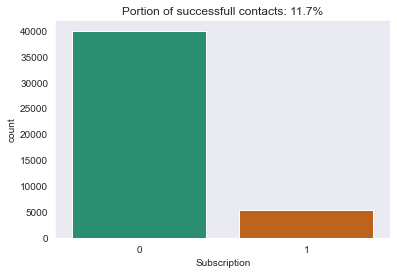

In [8]:
sns.countplot(x='Subscription', data = df_raw)
success_rate = round(100 * (len(df_raw[df_raw['Subscription'] == 1]) / len(df_raw)), 1)
plt.title('Portion of successfull contacts: '+ str(success_rate) +'%')

Very skewed data set

### Numerical feature analysis

In [9]:
df_numerical = df_raw.select_dtypes(include=['int64', 'float64'])

In [10]:
def num_subplots_historam(df):
    
    '''
    Generates histograms for numerical features
    '''
    no_features = len(df.columns)-1
    
    fig, axs = plt.subplots(no_features, 1, figsize=(12, no_features*3))
    fig.tight_layout()
    
    for col, current_ax in enumerate(axs):
        df = df.sort_values(by = df.columns[col])[1000:-1000]
        sns.histplot(df, x=df.columns[col], hue = 'Subscription', ax=current_ax, palette='Dark2')

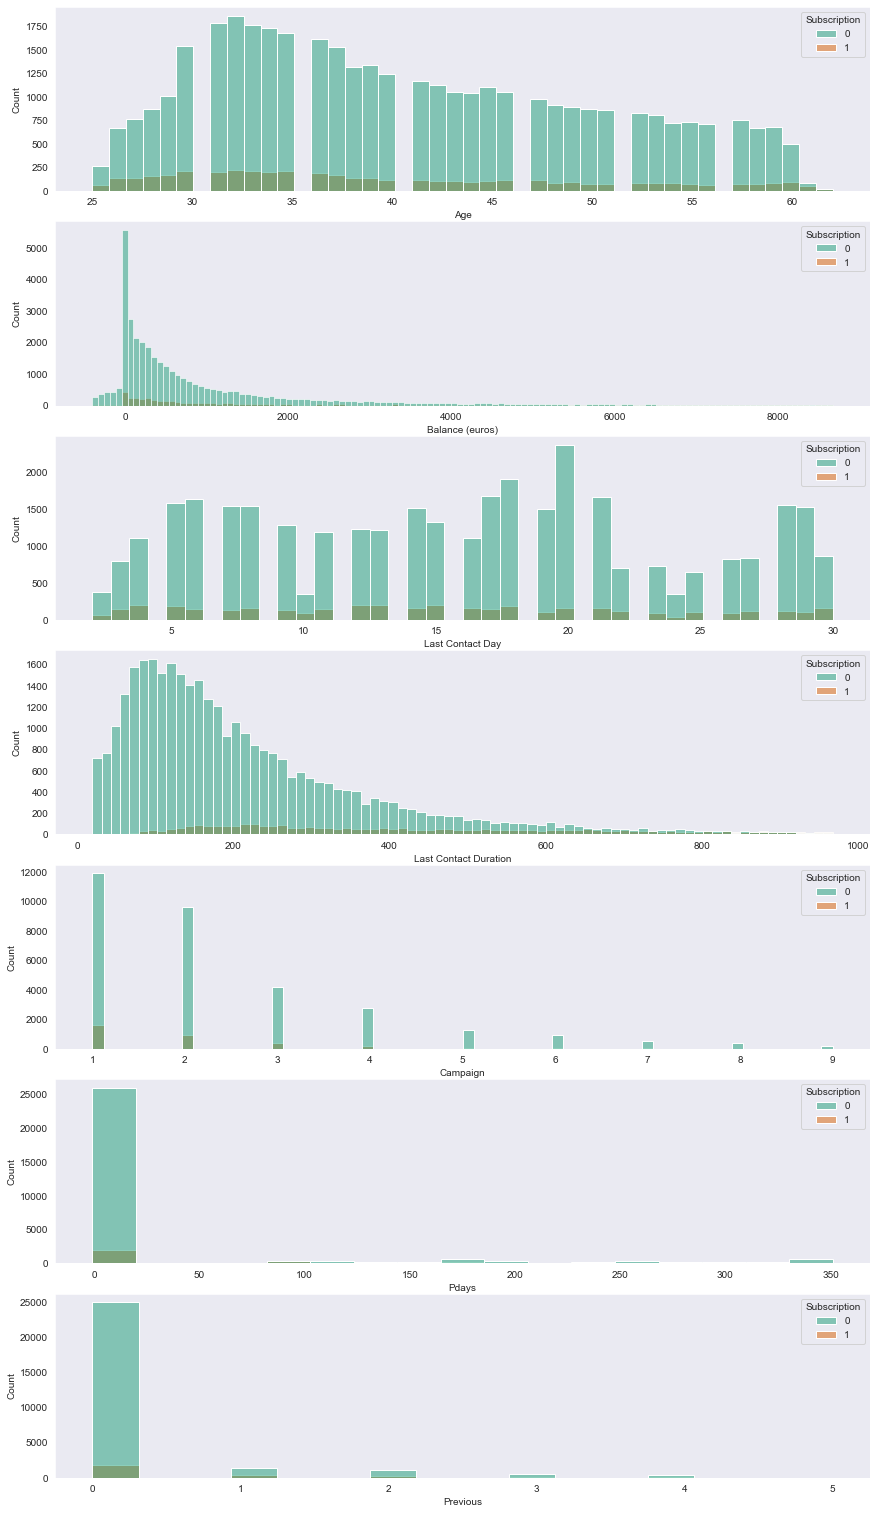

In [11]:
num_subplots_historam(df_numerical)

<AxesSubplot:xlabel='Pdays', ylabel='Count'>

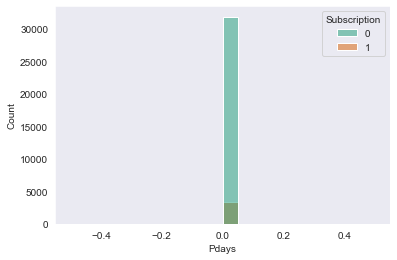

In [102]:
df_pdays = df_numerical[['Pdays','Subscription']].sort_values(by = 'Pdays')[:-10000]
sns.histplot(df_pdays, x='Pdays', hue = 'Subscription', palette='Dark2', bins=20)

<AxesSubplot:xlabel='Previous', ylabel='Count'>

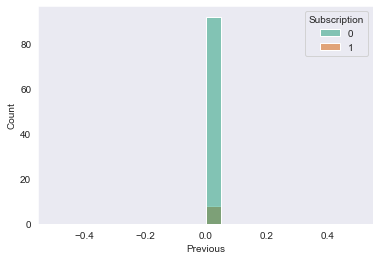

In [104]:
df_pdays = df_numerical[['Previous','Subscription']].sort_values(by = 'Previous')[:100]
sns.histplot(df_pdays, x='Previous', hue = 'Subscription', palette='Dark2', bins=20)

In [28]:
df_numerical.head(3)

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0


In [42]:
to_round = (df_numerical['Age'].max()-df_numerical['Age'].min())/20

In [43]:


df_numerical['Age'].apply(lambda x: to_round*round(x/to_round)).unique()


array([57.75, 42.35, 34.65, 46.2 , 26.95, 30.8 , 53.9 , 50.05, 61.6 ,
       23.1 , 38.5 , 19.25, 65.45, 84.7 , 73.15, 69.3 , 77.  , 88.55,
       80.85, 92.4 , 96.25])

### Categorical feature analysis

In [12]:
df_categorical = pd.concat([df_raw.select_dtypes(include=['object']),df_raw['Subscription']], axis=1)

In [94]:
def cat_features_countplots(df):
    no_features = len(df.columns)-1
    columns = df.columns

    fig, axs = plt.subplots(no_features, 1, figsize=(10, no_features*3))
    fig.tight_layout()

    for col_no, current_ax in enumerate(axs):
        
        sns.countplot(data = df, x=columns[col_no], hue='Subscription', ax=current_ax)
        

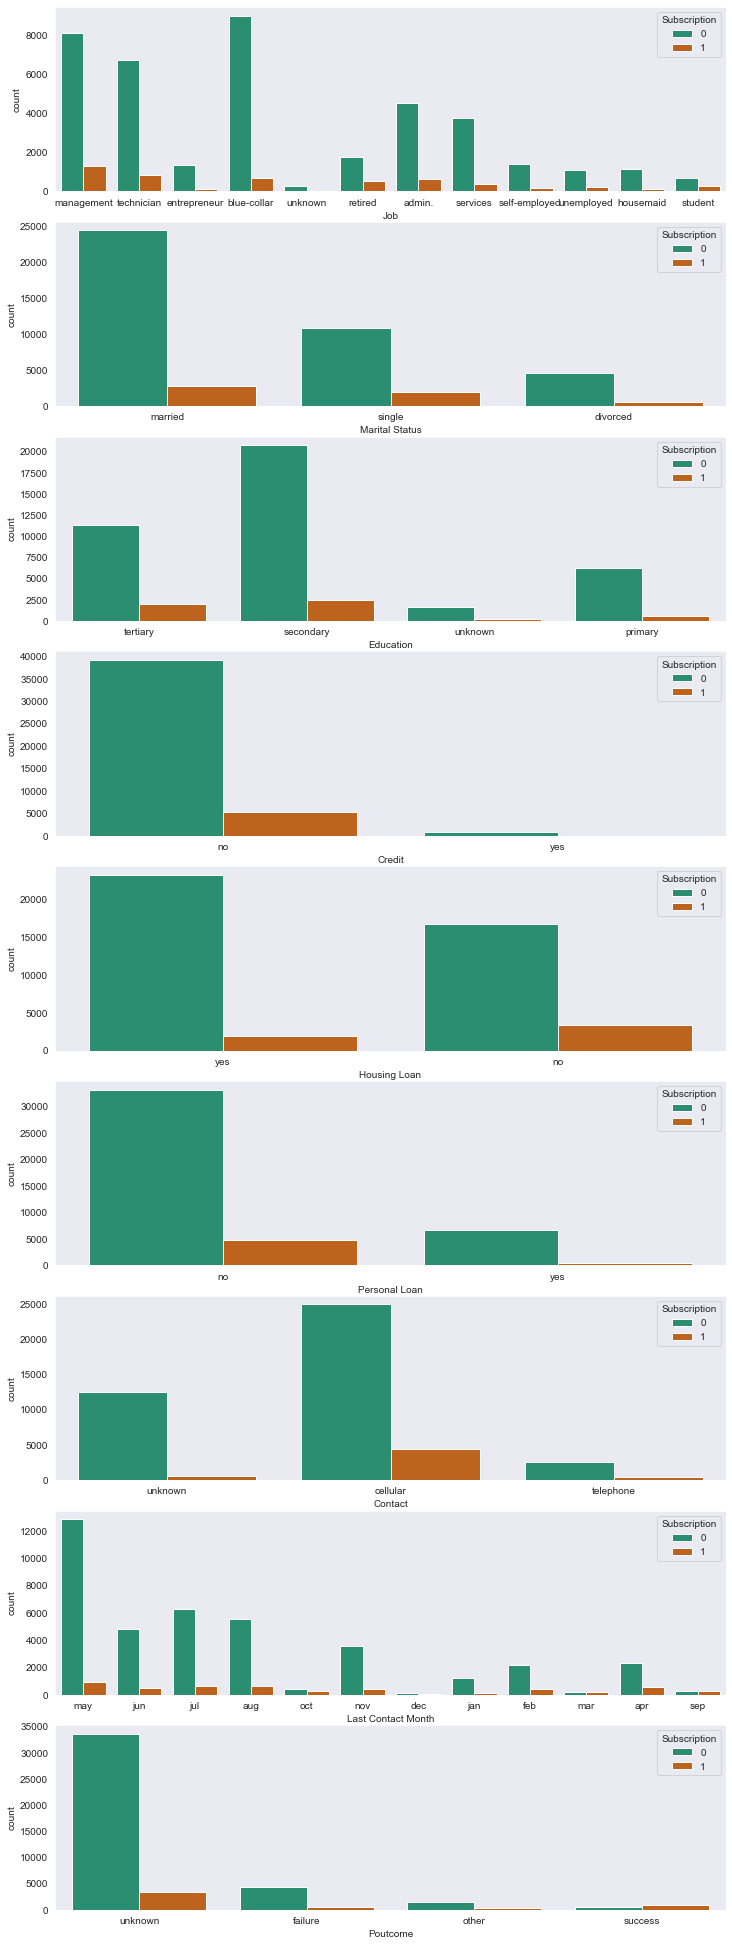

In [95]:
cat_features_countplots(df_categorical)

In [114]:
months = dict(zip(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
       'oct', 'nov', 'dec'],[1,2,3,4,5,6,7,8,9,10,11,12]))

<ipython-input-119-8fd6501b2b46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_cont['Last Contact Month'] = df_last_cont['Last Contact Month'].replace(months)


<AxesSubplot:xlabel='Last Contact Month', ylabel='count'>

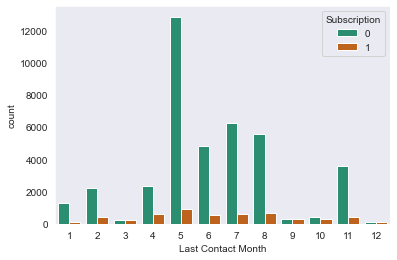

In [119]:
df_last_cont = df_categorical[['Last Contact Month', 'Subscription']]#.rename(months,).sort_values(by='Last Contact Month')
df_last_cont['Last Contact Month'] = df_last_cont['Last Contact Month'].replace(months)

sns.countplot(data = df_last_cont , x='Last Contact Month', hue='Subscription')


In [25]:
def cat_features_100_plots(df):
    no_features = len(df.columns)-1
    columns = df.columns

    fig, axs = plt.subplots(no_features, 1, figsize=(10, no_features*3))
    fig.tight_layout()

    for col_no, current_ax in enumerate(axs):
        
        x = pd.DataFrame(df_categorical.groupby(columns[col_no])['Subscription'].value_counts(normalize=True)).rename(columns={'Subscription' : 'y'}).reset_index()
        sns.histplot(x, x=columns[col_no], hue='Subscription', weights='y', multiple='stack', ax=current_ax)
        current_ax.axhline(success_rate/100, color='black', linestyle='dotted')

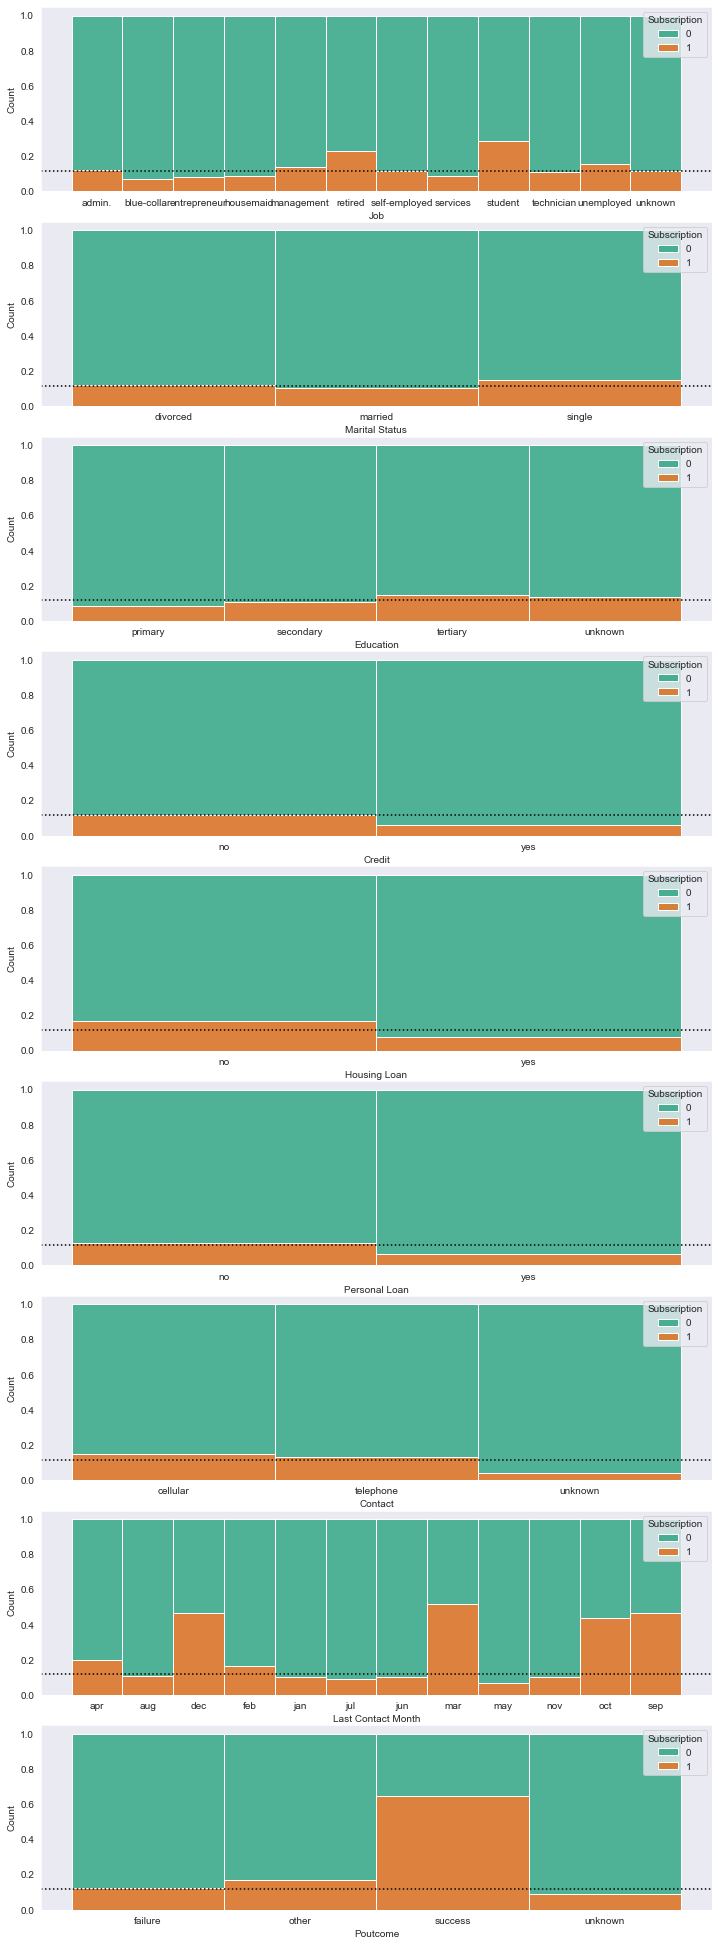

In [26]:
cat_features_100_plots(df_categorical)

## Data preparation

In [27]:
features = df_raw.drop('Subscription', axis=1)
y = df_raw['Subscription']

#OneHot to deal with categorical variables

features_onehot = pd.get_dummies(features)

#Feature scaling of (numerical) features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_scaled = StandardScaler().fit_transform(features_onehot)

#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.33, random_state=42)

### Model testing

##### Random forest

Training accuracy: 1.00
Training ROC-AUC score: 1.00


Test accuracy: 0.91
Test ROC-AUC score: 0.69


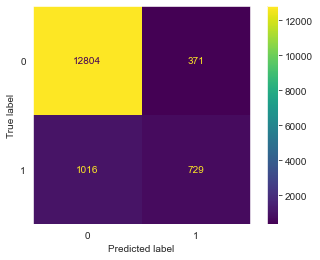

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

rnd_for = RandomForestClassifier()
rnd_for.fit(X_train, y_train)

train_preds = rnd_for.predict(X_train)
test_preds = rnd_for.predict(X_test)

print('Training accuracy: {:.2f}'.format(rnd_for.score(X_train, y_train)))
print('Training ROC-AUC score: {:.2f}\n\n'.format(roc_auc_score(y_train, train_preds)))
print('Test accuracy: {:.2f}'.format(rnd_for.score(X_test, y_test)))
print('Test ROC-AUC score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))
      
plot_confusion_matrix(rnd_for, X_test, y_test)

#### GradientboositingClassifier

Training accuracy: 0.91
Training ROC-AUC score: 0.71


Test accuracy: 0.90
Test ROC-AUC score: 0.69


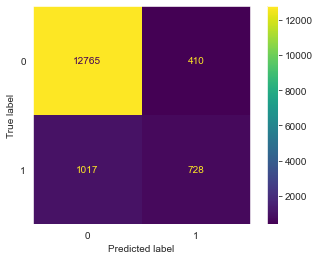

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

train_preds = gbc.predict(X_train)
test_preds = gbc.predict(X_test)

print('Training accuracy: {:.2f}'.format(gbc.score(X_train, y_train)))
print('Training ROC-AUC score: {:.2f}\n\n'.format(roc_auc_score(y_train, train_preds)))
print('Test accuracy: {:.2f}'.format(gbc.score(X_test, y_test)))
print('Test ROC-AUC score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))
      
plot_confusion_matrix(gbc, X_test, y_test)

##### SVM

C:\Users\HUS67557620\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training accuracy: 0.90
Training ROC-AUC score: 0.64


Test accuracy: 0.90
Test ROC-AUC score: 0.64


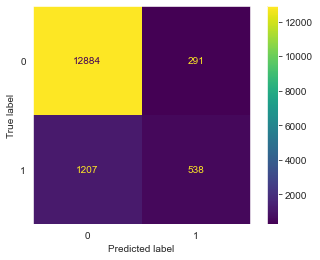

In [79]:
from sklearn.svm import LinearSVC

svc = LinearSVC(max_iter = 10000)
svc.fit(X_train, y_train)

train_preds = svc.predict(X_train)
test_preds = svc.predict(X_test)

print('Training accuracy: {:.2f}'.format(svc.score(X_train, y_train)))
print('Training ROC-AUC score: {:.2f}\n\n'.format(roc_auc_score(y_train, train_preds)))
print('Test accuracy: {:.2f}'.format(svc.score(X_test, y_test)))
print('Test ROC-AUC score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))
      
plot_confusion_matrix(svc, X_test, y_test)

# Best model: GradientBoostingClassifier

### Parameter finetuning with Gridsearch

Training accuracy: 0.92
Training ROC-AUC score: 0.72


Test accuracy: 0.91
Test ROC-AUC score: 0.70


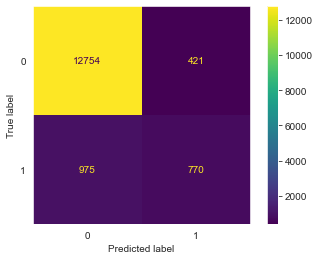

In [82]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

parameters = {'learning_rate': [0.01,0.1,1],
                  'n_estimators' : [100,1000, 1500],
                  'max_depth'    : [3,6,10]
                 }
gbc = GradientBoostingClassifier(random_state=0)

cv_gbr = HalvingGridSearchCV(gbc, parameters)
cv_gbr.fit(X_train, y_train)

train_preds = cv_gbr.predict(X_train)
test_preds = cv_gbr.predict(X_test)

print('Training accuracy: {:.2f}'.format(cv_gbr.score(X_train, y_train)))
print('Training ROC-AUC score: {:.2f}\n\n'.format(roc_auc_score(y_train, train_preds)))
print('Test accuracy: {:.2f}'.format(cv_gbr.score(X_test, y_test)))
print('Test ROC-AUC score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))
      
plot_confusion_matrix(cv_gbr, X_test, y_test)

In [86]:
cv_gbr.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1500}

### Expanding the search space as the best parameters found are on the edges

Training accuracy: 0.90
Training ROC-AUC score: 0.65


Test accuracy: 0.90
Test ROC-AUC score: 0.64


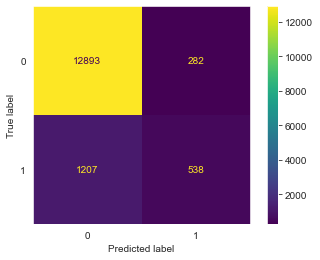

In [88]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

parameters = {'learning_rate': [0.001, 0.005, 0.01],
                  'n_estimators' : [1500,3000,6000],
                  'max_depth'    : [1,2,3]
                 }
gbc = GradientBoostingClassifier(random_state=0)

cv_gbr = HalvingGridSearchCV(gbc, parameters)
cv_gbr.fit(X_train, y_train)

train_preds = cv_gbr.predict(X_train)
test_preds = cv_gbr.predict(X_test)

print('Training accuracy: {:.2f}'.format(cv_gbr.score(X_train, y_train)))
print('Training ROC-AUC score: {:.2f}\n\n'.format(roc_auc_score(y_train, train_preds)))
print('Test accuracy: {:.2f}'.format(cv_gbr.score(X_test, y_test)))
print('Test ROC-AUC score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))
      
plot_confusion_matrix(cv_gbr, X_test, y_test)

In [89]:
cv_gbr.best_params_

{'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 3000}

##### --> Decreased performance

#### Further feature engineering
 

Removal of features: <br>Last Contact day - without year information we do not know weekday, and this info noes not seem useless <br> 
Pdays, Previous, Poutcome - Heavily skewed as most customers have not been contacted yet <br>
Credit - very skewed <br>
Contact - makes no sense for this to impact result <br>
Last Contact Month - success rate correlates with contact counts, very high rates when contact amounts low and vise versa 

### Data preparation with removed features

In [126]:
features = df_raw.drop(['Last Contact Day', 'Pdays', 'Previous', 'Credit', 'Contact', 'Last Contact Month', 'Poutcome', 'Subscription'], axis=1)
y = df_raw['Subscription']

#OneHot to deal with categorical variables

features_onehot = pd.get_dummies(features)

#Feature scaling of (numerical) features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_scaled = StandardScaler().fit_transform(features_onehot)

#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.33, random_state=42)

### RandomForest

Training accuracy: 1.00
Training ROC-AUC score: 1.00


Test accuracy: 0.89
Test ROC-AUC score: 0.63


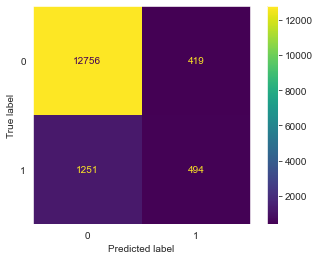

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix

rnd_for = RandomForestClassifier()
rnd_for.fit(X_train, y_train)

train_preds = rnd_for.predict(X_train)
test_preds = rnd_for.predict(X_test)

print('Training accuracy: {:.2f}'.format(rnd_for.score(X_train, y_train)))
print('Training ROC-AUC score: {:.2f}\n\n'.format(roc_auc_score(y_train, train_preds)))
print('Test accuracy: {:.2f}'.format(rnd_for.score(X_test, y_test)))
print('Test ROC-AUC score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))
      
plot_confusion_matrix(rnd_for, X_test, y_test)

### GradientBoosingClassifier

Training accuracy: 0.90
Training ROC-AUC score: 0.64


Test accuracy: 0.89
Test ROC-AUC score: 0.62


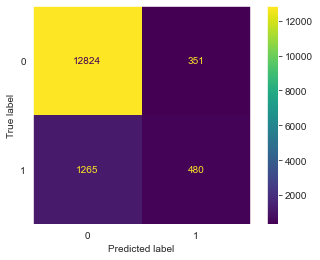

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

train_preds = gbc.predict(X_train)
test_preds = gbc.predict(X_test)

print('Training accuracy: {:.2f}'.format(gbc.score(X_train, y_train)))
print('Training ROC-AUC score: {:.2f}\n\n'.format(roc_auc_score(y_train, train_preds)))
print('Test accuracy: {:.2f}'.format(gbc.score(X_test, y_test)))
print('Test ROC-AUC score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))
      
plot_confusion_matrix(gbc, X_test, y_test)

### SVM Classifier

Training accuracy: 0.89
Training ROC-AUC score: 0.56


Test accuracy: 0.89
Test ROC-AUC score: 0.56


C:\Users\HUS67557620\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


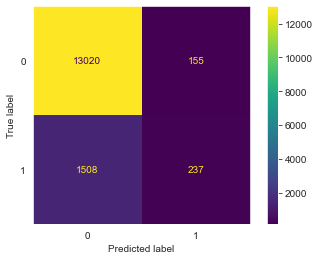

In [129]:
from sklearn.svm import LinearSVC

svc = LinearSVC(max_iter = 10000)
svc.fit(X_train, y_train)

train_preds = svc.predict(X_train)
test_preds = svc.predict(X_test)

print('Training accuracy: {:.2f}'.format(svc.score(X_train, y_train)))
print('Training ROC-AUC score: {:.2f}\n\n'.format(roc_auc_score(y_train, train_preds)))
print('Test accuracy: {:.2f}'.format(svc.score(X_test, y_test)))
print('Test ROC-AUC score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))
      
plot_confusion_matrix(svc, X_test, y_test)

In [130]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

parameters = {'learning_rate': [0.01,0.1,1],
                  'n_estimators' : [100,1000, 1500],
                  'max_depth'    : [3,6,10]
                 }
gbc = GradientBoostingClassifier(random_state=0)

cv_gbr = HalvingGridSearchCV(gbc, parameters)
cv_gbr.fit(X_train, y_train)

train_preds = cv_gbr.predict(X_train)
test_preds = cv_gbr.predict(X_test)

print('Training accuracy: {:.2f}'.format(cv_gbr.score(X_train, y_train)))
print('Training ROC-AUC score: {:.2f}\n\n'.format(roc_auc_score(y_train, train_preds)))
print('Test accuracy: {:.2f}'.format(cv_gbr.score(X_test, y_test)))
print('Test ROC-AUC score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))
      

Training accuracy: 0.90
Training ROC-AUC score: 0.64


Test accuracy: 0.89
Test ROC-AUC score: 0.62


### Worse results with all classifier after removing seemingly useless features

# GradientBoostingClassifier feature importance for explainability

Re-do data preprosessing

In [ ]:
features = df_raw.drop('Subscription', axis=1)
y = df_raw['Subscription']

#OneHot to deal with categorical variables

features_onehot = pd.get_dummies(features)

#Feature scaling of (numerical) features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_scaled = StandardScaler().fit_transform(features_onehot)

#Train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_scaled, y, test_size=0.33, random_state=42)

Re-fit with optimal parameters

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

gbc = GradientBoostingClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 1500)
gbc.fit(X_train, y_train)

#train_preds = gbc.predict(X_train)
#test_preds = gbc.predict(X_test)

#print('Training accuracy: {:.2f}'.format(gbc.score(X_train, y_train)))
#print('Training ROC-AUC score: {:.2f}\n\n'.format(roc_auc_score(y_train, train_preds)))
#print('Test accuracy: {:.2f}'.format(gbc.score(X_test, y_test)))
#print('Test ROC-AUC score: {:.2f}'.format(roc_auc_score(y_test, test_preds)))
      
#plot_confusion_matrix(gbc, X_test, y_test)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500)

Feature importances

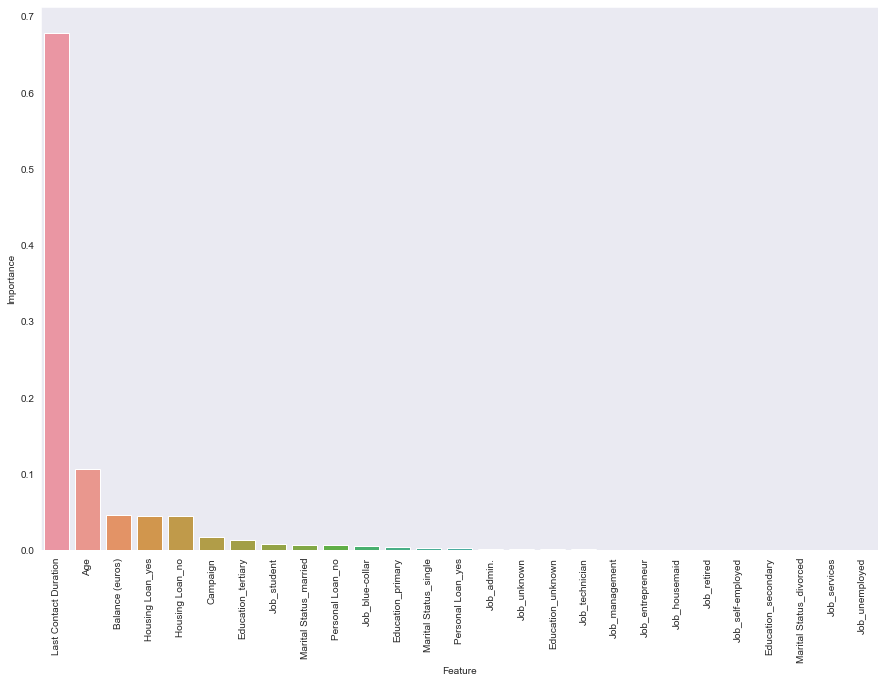

In [151]:
df_features = pd.DataFrame({'Feature' : features_onehot.columns, 'Importance' : gbc.feature_importances_}).sort_values(by='Importance', ascending = False)

fix, ax = plt.subplots(figsize =(15,10))
sns.barplot(x = df_features['Feature'], y = df_features['Importance'], ax=ax)
ax.tick_params(axis='x', labelrotation=90)

Feature importances in line with the EDA graphs, and they seem also logical. <br>
In practice, if this model would be used for selecting who to contact, one would choose people with certain age, low Balance, and without Housing loan.